# Numerical integration of ordinary differential equations

##1. Introduction
Attainable Region theory often deals with the integration of a system of ordinary differential equations (ODEs). These systems arise when Plug Flow Reactors (PFRs) and Differential Side-stream Reactors (DSRs) are employed in the construction of the AR. Due to the non-linear nature of these functions, as well as the relatively large number of simultaneous equations that must be solved for the systems of interest, we must often rely on *numerical* integration to compute our solutions. 

Below, we provide a basic set of instructions for how one might integrate a system of ODEs on a computer. These results may then be used to develop a graph for Attainable Regions analysis. The Python programming language is used for demonstration, however other numerical environments such, as MATLAB, follow a similar procedure.

##Python and SciPy
SciPy is a collection of open-source Python packages and software for mathematical and scientific computing. Specific routines contained within the SciPy package allow for the numerical integratation of ODEs. Instructions on how to obtain and install SciPy can be found on their website:
- http://www.scipy.org/

Alternatively, the Anaconda disribution incorporates a number of useful Python software including SciPy, into a single installable package. This makes it convenient to begin working on problems quickly without the need to download, install and configure multiple Python packages, which may also require the installation of additional packages (dependencies).
- http://continuum.io/downloads

##2. Example system

Suppose that the following system of differential equations is to be integrated: 

$$ \begin{align}
\frac{\mathrm{d}y_{1}}{\mathrm{dt}} &=y_{3} \\
\frac{\mathrm{d}y_{2}}{\mathrm{dt}} &=\sin\left(\mathrm{t}y_{1}\right) \\
\frac{\mathrm{d}y_{3}}{\mathrm{dt}} &=\mathrm{t}
\end{align}
$$

The above system involves three ordinary differential equations and is a function of all three variables as well as the integration parameter t.

### 2.1 Importing SciPy
Once SciPy has been installed, we can import Scipy using the `import` command:

In [1]:
import scipy as sp

A number of sub-packages are contained within SciPy. The `odeint()` function is employed to integrate ODEs specifically. This function is contained in the `integrate` package. The following Python code imports the `odeint()` function from the `scipy.integrate` package. 

In [2]:
from scipy.integrate import odeint

Futher information about this function can be found at 

- http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.integrate.odeint.html

###2.2 Defining the system
We define our system as a Python function involving two parameters: 
1. A vector $\mathbf{y}=\begin{bmatrix}y_{1} & y_{2} & y_{3}\end{bmatrix}^{T}$ containing the state variables 
2. The integration parameter t

In [3]:
def dy_fn(y, t):
    y1 = y[0]
    y2 = y[1]
    y3 = y[2]
    
    dy1 = y3
    dy2 = sp.sin(t*y1)
    dy3 = t
    
    dydt = [dy1, dy2, dy3]
    return dydt

The function is named `dy_fn(y, t)` and returns a vector containing the three differential equations. By convention, the function to be integrated must define the state variables as its first argument, and the integration parameter as its second argument.

###2.3 Initial conditions
A solution to this system is obtained by specifiying an initial condition, $\mathbf{y}_0$, and an integration range. An initial condition of 
$$ \mathbf{y}_{0}=\begin{bmatrix}1.0\\
1.0\\
1.0
\end{bmatrix}
 $$
 
and an integration range of $ 0.0\leq\mathrm{t}\leq4.0 $ is used here for demonstration purposes.

In [4]:
y0 = [1.0, 1.0, 1.0]

t0 = 0
tf = 4
N = 200    #number of time points
ts = sp.linspace(t0,tf,N)

The SciPy function `linspace()` is used to generate an array of `N` evenly spaced time points between 0.0 and 4.0 for which y will be solved for. Next, the function is integrated by calling `odeint()` with the function to be integrated as its first argument, the initial conditions vector `y0` as the second arguement and the time points at which the function to be evaluated at as the third arguement.

In [5]:
ys = odeint(dy_fn,y0,ts)

It is also possible to define integration options in more detail by passing additional arguments to `odeint()`. These details can be found on the odeint reference domcumentation online, using the link provided above.

The result of the integration is stored in a $N \times3$ matrix named `ys`. The columns of `ys` correspond to $y_1$, $y_2$ and $y_3$, respectively, whilst the number of rows in `ys` is equal to the entries in variable `ts`. Hence, each row in `ys` corresponds to the y values of the system evaluated at that time. The results may then be plotted using `matplotlib`

### 2.4 Plotting in matplotlib
Matplotlb is a Python plotting library that is bundled with SciPy. Specifically `pyplot`, a sub-package of the `matplotlib` package, is used to plot two dimensional plots. The choice of function names and calling convention is very similar to that of MATLAB. 

- http://matplotlib.org/index.html

Importing `pyplot` from matplotlib is done below

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

For IPython notebooks specifically, including `%matplotlib inline` will allow for figures to be displayed inside the notebook rather than in a separate window.

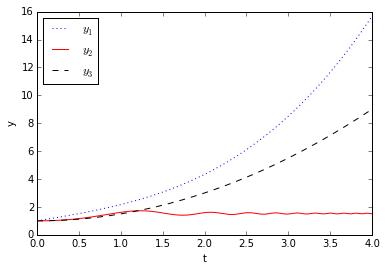

In [7]:
plt.figure()
plt.hold(True)

line1, = plt.plot(ts,ys[:,0], 'b:')
line2, = plt.plot(ts,ys[:,1], 'r-')
line3, = plt.plot(ts,ys[:,2], 'k--')

plt.legend([line1, line2, line3], ['$y_1$', '$y_2$', '$y_3$'], loc=2)
plt.xlabel('t')
plt.ylabel('y')
plt.show()

Alternatively, we could plot $y_1$ against $y_2$ in the phase plane to gain an understanding of how $y_2$ varies with $y_1$:

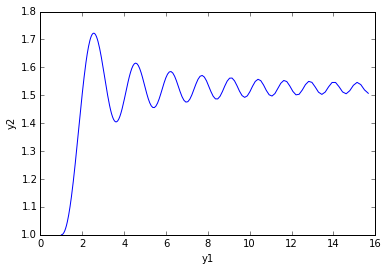

In [8]:
plt.figure()
plt.hold(True)

plt.plot(ys[:,0],ys[:,1], 'b-')

plt.xlabel('y1')
plt.ylabel('y2')
plt.show()

##3. A motivating example from Attainable Regions

###3.1 The van de Vusse system
The following reaction shows a system of three independent reactions involving four components A, B, C and D:

$$ \mathrm{A}	\rightarrow	\mathrm{B}\rightarrow\mathrm{C} \\
2\mathrm{A}	\rightarrow	\mathrm{D}
 $$
 
This system, often referred to as the van de Vusse system, is common in Attainable Regions theory. Species reaction rates for the system as assumed to obey mass action kinetics, that is, the component rate functions may be expressed as follows:

$$ \begin{align}
r_{A} &=-k_{1}c_{A}-2k_{3}c_{A}^{2} \\
r_{B} &=k_{1}c_{A}-k_{2}c_{B} \\
r_{C} &=k_{2}c_{B} \\
r_{D} &=k_{3}c_{A}^{2}
\end{align}
$$

where $k_1 = 1 \,\mathrm{s^{-1}}$, $k_2 = 1 \,\mathrm{s^{-1}}$ and $k_3 = 10 \,\mathrm{L.mol^{-1}.s^{-1}}$ are rate constants.

Suppose that we wish to determine the concentration profiles for this system in  a PFR with a residence time of $\tau = 10 \, \mathrm{s}$. The feed concentration to the PFR is is assumed to be pure in A. The concentration of A is assumed to be 1.0 mol/L The initial condition of the PFR may then be expressed as:

$$
\mathbf{C_{f}}=\begin{bmatrix}c_{A}^{0}\\
c_{B}^{0}\\
c_{C}^{0}\\
c_{D}^{0}
\end{bmatrix}=\begin{bmatrix}1.0\\
0.0\\
0.0\\
0.0
\end{bmatrix}
$$

###3.3 PFR equation
The PFR equation is given in vector form by

$$ \frac{\mathrm{d}\mathbf{C}}{\mathrm{d}\tau}=\mathbf{r}\left(\mathbf{C}\right) $$

where $\mathbf{r}\left(\mathbf{C}\right)$ is a vector containing the component rate expressions:

$$ \mathbf{r}\left(\mathbf{C}\right)=\begin{bmatrix}r_{A}\\
r_{B}\\
r_{C}\\
r_{D}
\end{bmatrix}$$

Hence, the solution of the PFR equation involves the integration of a system of ordinary differential equations. The solution method described above is thus useful for computing species concentrations in the PFR over time.

###3.2 Defining the van de Vusse rate vector
We begin by defining the species reaction rates for the van de Vusse system as a Python function that returns a vector (in this instance a Python array) containing $r_A$, $r_B$, $r_C$ and $r_D$.

In [9]:
def vdv_rate(C,t):
    cA = C[0]
    cB = C[1]
    
    k1 = 1.0
    k2 = 1.0
    k3 = 10.0
    
    rA = -k1*cA - 2.0*cA**2
    rB = k1*cA - k2*cB
    rC = k2*cB
    rD = k3*cA**2
    
    return [rA, rB, rC, rD]

###3.3 Initial conditions
Next, initial conditions and integration parameters are specified. For the PFR, the initial conditions are simply the feed concentration to the PFR

In [10]:
Cf = [1.0, 0.0, 0.0, 0.0]
#pfr_ts = sp.logspace(-3,1,100)
pfr_ts = sp.linspace(0,10,100)

We used a log spacing for the PFR becuase the concentrations often vary exponentially with time. Next, the function can be integrated

In [11]:
pfr_cs = odeint(vdv_rate,Cf,pfr_ts)

This concentrations can now be plotted with matplotlib

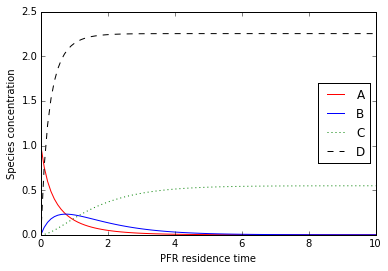

In [12]:
plt.figure()
plt.hold(True)

lineA, = plt.plot(pfr_ts, pfr_cs[:,0], 'r-')
lineB, = plt.plot(pfr_ts, pfr_cs[:,1], 'b-')
lineC, = plt.plot(pfr_ts, pfr_cs[:,2], 'g:')
lineD, = plt.plot(pfr_ts, pfr_cs[:,3], 'k--')

plt.legend([lineA, lineB, lineC, lineD], ['A', 'B', 'C', 'D'], loc=5)
plt.xlabel('PFR residence time')
plt.ylabel('Species concentration')

plt.show()

Alternatively, we can plot pairs of concentrations, such as $c_A$ vs. $c_B$:

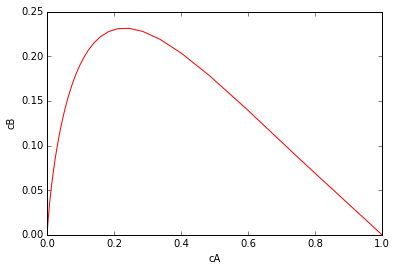

In [13]:
plt.figure()

plt.plot(pfr_cs[:,0], pfr_cs[:,1], 'r-')

plt.xlabel('cA')
plt.ylabel('cB')

plt.show()

or, perhaps, $c_C$ vs. $c_D$:

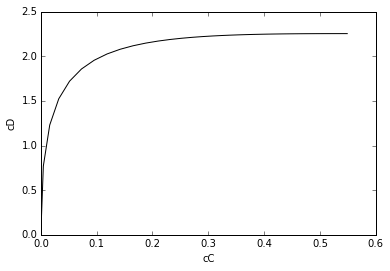

In [14]:
plt.figure()

plt.plot(pfr_cs[:,2], pfr_cs[:,3], 'k-')

plt.xlabel('cC')
plt.ylabel('cD')

plt.show()